<a href="https://colab.research.google.com/github/juanmelafias/course-collaboration-travel-plans/blob/master/CAP_Apache_Spark_Colab_2021.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Puesta en marcha

Una de las formas más fáciles (*hay muchas) de empezar con PySpark es usando Google Colab. Para instalar PySpark en su máquina virtual Colab, debe ejecutar los siguientes códigos.
Dicho esto, encontrarás el código abajo en los otros cuadernos de laboratorio, cada vez que usemos PySpark. Además, el código aquí es sólo para el entorno Colab. Si ha configurado PySpark en su máquina local o en otro entorno propio, no necesitará ejecutar los códigos siguientes.

In [ ]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q https://dlcdn.apache.org/spark/spark-3.1.2/spark-3.1.2-bin-hadoop3.2.tgz
!tar xf spark-3.1.2-bin-hadoop3.2.tgz
!pip install -q findspark

In [ ]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.1.2-bin-hadoop3.2"

In [ ]:
import findspark
findspark.init()

In [ ]:
from pyspark.sql import SparkSession
from pyspark import SparkContext, SparkConf

conf = SparkConf().set('spark.ui.port', '4050')
sc = SparkContext(conf=conf)
spark = SparkSession.builder.master('local[*]').getOrCreate()

spark

In [5]:
fichero = sc.textFile('palabras.txt')

Colocando un numero tras coma después del fichero, divdiimos el procesamiento de la tarea en n particiones. Esta partición tambien se puede hacer mas adelante con el metodo .repartition. Esto se hace para tener un grado más alto de paralelismo

In [ ]:
fichero = sc.textFile('palabras.txt',4)

In [6]:
a = fichero.count()

In [7]:
print(a)

107714


In [8]:
fichero.take(10)

['a',
 'aba',
 'abaá',
 'ababillarse',
 'ababol',
 'abacá',
 'abacal',
 'abacalera',
 'abacalero',
 'abacera']

In [ ]:
def notilde(a):
  if a in ['ú','ü']:
    return 'u'
  elif a in ['á']:
    return 'a'
  elif a in ['í']:
    return 'i'   
  elif a in ['ó']:
    return 'o'
  elif a in ['é']:
    return 'e'
  else:
    return a
  

In [ ]:
b = fichero()

In [13]:
def spellchecker(a,b):
  if a in [b]:
    return True
  else:
    return False

In [ ]:
def esvocal(a):
  if a in ['a','e','i','o','u']:
    return True
  else:
    return False

In [ ]:
notilde('ü')

'u'

In [17]:
b = fichero.filter(lambda x: spellchecker(x,'fdf'))
b.isEmpty()
if b is

True

In [ ]:
b = fichero.flatMap(lambda x: x.lower())
c = b.map(lambda x: notilde(x)).filter(esvocal).map(lambda x: (x,1))
d = c.reduceByKey(lambda x,y: x+y)
fin = d.sortBy(lambda x: x[1], False).collect()
#fin.repartition(1,1).saveasTextFile('salida4')

AttributeError: ignored

In [ ]:
b = fichero.map(lambda x: x.upper())
print(b.take(5))

['A', 'ABA', 'ABAÁ', 'ABABILLARSE', 'ABABOL']


In [ ]:
c = fichero.flatMap(lambda x: x.upper())
print(c.take(5))

['A', 'A', 'B', 'A', 'A']

SUGERENCIA: La siguiente celda muestra un truco para poder acceder al frontend de Apache Spark dentro de Google Colab.

In [ ]:
!wget -q https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
!unzip ngrok-stable-linux-amd64.zip
get_ipython().system_raw('./ngrok http 4050 &')
!curl -s http://localhost:4040/api/tunnels

Archive:  ngrok-stable-linux-amd64.zip
  inflating: ngrok                   
{"tunnels":[{"name":"command_line (http)","uri":"/api/tunnels/command_line%20%28http%29","public_url":"http://204963a76e62.ngrok.io","proto":"http","config":{"addr":"http://localhost:4050","inspect":true},"metrics":{"conns":{"count":0,"gauge":0,"rate1":0,"rate5":0,"rate15":0,"p50":0,"p90":0,"p95":0,"p99":0},"http":{"count":0,"rate1":0,"rate5":0,"rate15":0,"p50":0,"p90":0,"p95":0,"p99":0}}},{"name":"command_line","uri":"/api/tunnels/command_line","public_url":"https://204963a76e62.ngrok.io","proto":"https","config":{"addr":"http://localhost:4050","inspect":true},"metrics":{"conns":{"count":0,"gauge":0,"rate1":0,"rate5":0,"rate15":0,"p50":0,"p90":0,"p95":0,"p99":0},"http":{"count":0,"rate1":0,"rate5":0,"rate15":0,"p50":0,"p90":0,"p95":0,"p99":0}}}],"uri":"/api/tunnels"}


Podemos obtener la memoria empleada dentro del Driver

In [ ]:
from psutil import virtual_memory
ram_gb = virtual_memory().total / 1e9
print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))

Your runtime has 13.7 gigabytes of available RAM



Además, podemos conseguir el grado de paralelismo, es decir, el número de cores empleados.

In [ ]:
spark.sparkContext.defaultParallelism

2

#Primeros pasos

Crear un RDD que multiplique por 2 sus valores y sumar los resultados.

In [ ]:
from operator import add
rdd = sc.parallelize([1, 1, 1, 1, 2, 2, 2, 3, 3, 4])
rdd2 = rdd.map(lambda x: x*2)
tSum = rdd2.reduce(lambda x,y: x+y)
print (tSum)

40


Crear un diccionario con elementos (x,1) y sumar las apariciones por elemento.

In [ ]:
rdd_text = sc.parallelize(['red', 'red', 'blue', 'green', 'green','yellow'])
rdd_aux = rdd_text.map(lambda x: (x,1))
rdd_result = rdd_aux.reduceByKey(lambda x,y: x+y)
print (rdd_result.collect())

Creación a partir de diccionarios.

In [ ]:
a = sc.parallelize(['a','b','c','a'])
b = sc.parallelize([1,2,3,4])
rdd_kv = a.zip(b)
print (rdd_kv.collect())

[('a', 1), ('b', 2), ('c', 3), ('a', 4)]


#DataFrames

Ahora, definamos nuestro primer DataFrame PySpark. El DataFrame en PySpark es como una hoja de cálculo que acomoda los datos. Si ya estás familiarizado con Pandas, puedes asumir con seguridad que el PySpark DataFrame es algo así como el Pandas DataFrame (pero con características más potentes). 

Leamos un conjunto de datos de un archivo de valores separados por comas (CSV). PySpark viene con un conveniente conjunto de funciones (también llamadas 'métodos' en Python) para leer y analizar algunos formatos comunes de archivos de datos, como spark.read.csv() o spark.read.json(). Una vez que se analiza el contenido del archivo, los valores se devuelven como PySpark DataFrame. El uso real tiene el siguiente aspecto.

In [ ]:
!wget -q https://github.com/chadwickbureau/baseballdatabank/raw/master/core/People.csv
df = spark.read.csv('People.csv', header=True, inferSchema=True)

En la celda anterior, hemos descargado el conjunto de datos de las Grandes Ligas de Béisbol de la URL usando el comando "wget" (nota: es un comando de linux para descargar datos de la web), y lo hemos analizado en un DataFrame de PySpark llamado "df".

Nótese que el argumento `header=True` se usa para indicar que la primera fila del archivo CSV contiene el nombre de las columnas (parámetros). Si lo estableces como `None`, que es el valor por defecto, PySpark sólo obtendrá algunos nombres de columna aleatorios y la primera fila del archivo CSV sólo se asumirá como parte de las entradas de datos.

SUGERENCIA: Si deseas leer su propio archivo de datos en su disco local pero en Colab, aquí tiene una forma sencilla de hacerlo:
```python
from google.colab import files
files.upload()
```

Para ver el contenido de un DataFrame, el método `DataFrame.show()` proporciona una forma sencilla de comprobar los datos en bruto.


In [ ]:
df.show()

Otra forma de ver la estructura de los datos es imprimiendo, lo que se llama, Esquema. Mientras que los detalles se explicarán varias líneas más adelante, Esquema define el nombre de la columna, el tipo de variable y la nulidad de los datos. De nuevo, explicaré esos términos más tarde, pero por ahora, vamos a comprobar lo que ocurre cuando ejecutamos el método DataFrame.printSchema().

In [ ]:
df.printSchema()   # nullable --> sets missing data to null, when false, returns error

root
 |-- playerID: string (nullable = true)
 |-- birthYear: integer (nullable = true)
 |-- birthMonth: integer (nullable = true)
 |-- birthDay: integer (nullable = true)
 |-- birthCountry: string (nullable = true)
 |-- birthState: string (nullable = true)
 |-- birthCity: string (nullable = true)
 |-- deathYear: integer (nullable = true)
 |-- deathMonth: integer (nullable = true)
 |-- deathDay: integer (nullable = true)
 |-- deathCountry: string (nullable = true)
 |-- deathState: string (nullable = true)
 |-- deathCity: string (nullable = true)
 |-- nameFirst: string (nullable = true)
 |-- nameLast: string (nullable = true)
 |-- nameGiven: string (nullable = true)
 |-- weight: integer (nullable = true)
 |-- height: integer (nullable = true)
 |-- bats: string (nullable = true)
 |-- throws: string (nullable = true)
 |-- debut: timestamp (nullable = true)
 |-- finalGame: timestamp (nullable = true)
 |-- retroID: string (nullable = true)
 |-- bbrefID: string (nullable = true)



###Mostrar columnas específicas

A veces puede que quieras ver algunas columnas específicas del marco de datos. Para esos propósitos, puedes aprovechar las capacidades del SQL de Spark.

Usando la función select() puedes mencionar cualquier columna que quieras ver

In [ ]:
df = spark.read.csv("/content/sample_data/california_housing_train.csv", header=True, inferSchema=True)
df.select("longitude","latitude","median_house_value").show(5)

+---------+--------+------------------+
|longitude|latitude|median_house_value|
+---------+--------+------------------+
|  -114.31|   34.19|           66900.0|
|  -114.47|    34.4|           80100.0|
|  -114.56|   33.69|           85700.0|
|  -114.57|   33.64|           73400.0|
|  -114.57|   33.57|           65500.0|
+---------+--------+------------------+
only showing top 5 rows



###Describiendo las columnas
A menudo, cuando trabajamos con características numéricas, queremos echar un vistazo a las estadísticas relativas al marco de datos. La función describe() es la más adecuada para tales propósitos.

Es bastante similar a la función "describe" de Panda, pero los valores estadísticos son mucho menores y las columnas de cadenas también se describen.

In [ ]:
df.describe().show()

+-------+-------------------+------------------+------------------+-----------------+-----------------+------------------+-----------------+------------------+------------------+
|summary|          longitude|          latitude|housing_median_age|      total_rooms|   total_bedrooms|        population|       households|     median_income|median_house_value|
+-------+-------------------+------------------+------------------+-----------------+-----------------+------------------+-----------------+------------------+------------------+
|  count|              17000|             17000|             17000|            17000|            17000|             17000|            17000|             17000|             17000|
|   mean|-119.56210823529375|  35.6252247058827| 28.58935294117647|2643.664411764706|539.4108235294118|1429.5739411764705|501.2219411764706| 3.883578100000021|207300.91235294117|
| stddev| 2.0051664084260357|2.1373397946570867|12.586936981660406|2179.947071452777|421.4994515798648| 1

## Algunas operaciones básicas
Ahora que entendemos la estructura básica de los Spark DataFrames, veamos algunas operaciones básicas que nos permiten interactuar con los datos.

In [ ]:
!wget -q https://github.com/chadwickbureau/baseballdatabank/raw/master/core/Batting.csv
df = spark.read.csv('Batting.csv', header=True, inferSchema=True)
df.show()

+---------+------+-----+------+----+---+---+---+---+---+---+---+---+---+---+---+---+----+----+----+----+----+
| playerID|yearID|stint|teamID|lgID|  G| AB|  R|  H| 2B| 3B| HR|RBI| SB| CS| BB| SO| IBB| HBP|  SH|  SF|GIDP|
+---------+------+-----+------+----+---+---+---+---+---+---+---+---+---+---+---+---+----+----+----+----+----+
|abercda01|  1871|    1|   TRO|  NA|  1|  4|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|null|null|null|null|   0|
| addybo01|  1871|    1|   RC1|  NA| 25|118| 30| 32|  6|  0|  0| 13|  8|  1|  4|  0|null|null|null|null|   0|
|allisar01|  1871|    1|   CL1|  NA| 29|137| 28| 40|  4|  5|  0| 19|  3|  1|  2|  5|null|null|null|null|   1|
|allisdo01|  1871|    1|   WS3|  NA| 27|133| 28| 44| 10|  2|  2| 27|  1|  1|  0|  2|null|null|null|null|   0|
|ansonca01|  1871|    1|   RC1|  NA| 25|120| 29| 39| 11|  3|  0| 16|  6|  2|  2|  1|null|null|null|null|   0|
|armstbo01|  1871|    1|   FW1|  NA| 12| 49|  9| 11|  2|  1|  0|  5|  0|  1|  0|  1|null|null|null|null|   0|
|barkeal01

### Seleccionando Columnas

A medida que analizas los datos, lo que harás a menudo es seleccionar unos cuantos subconjuntos de columnas de un conjunto de datos y procesarlos. En PySpark, la selección de una columna es tan simple como `df['nombre_de_columna']`.

In [ ]:
df['playerID']

Column<b'playerID'>

Observe que la celda de arriba imprime un objeto de la columna de Spark. Para verlo de forma más explícita, puedes ejecutar `type()` function en Python para comprobar el tipo de datos.

In [ ]:
type(df['playerID'])

pyspark.sql.column.Column

Una cosa importante a recordar aquí es que los objetos de la columna  **no** son lo mismo que los DataFrames. Por ejemplo, el método "show()" que estaba disponible para los DataFrames habituales **no funcionará** con un objeto de columna. Por lo tanto, se **supone que la siguiente celda devuelve un error de compilación**:

In [ ]:
df['playerID'].show()

Entonces, ¿por qué la gente se molestó en crear un tipo de datos de columna? Bueno, como veremos más adelante, una razón es para utilizarlo como una referencia eficiente (algo así como un puntero) a una columna. Por ahora, sin embargo, debería ser suficiente para entender que los objetos de la columna no son DataFrames.

¿Qué deberíamos hacer entonces, si queremos manejar las columnas como los habituales DataFrames? En otras palabras, ¿qué deberíamos hacer si queremos llamar al método `show()` para imprimir el contenido de una columna específica? Para este propósito, hay un método `select()` que se puede llamar desde un DataFrame. Véase el ejemplo siguiente.

In [ ]:
df.select('playerID')

Ahora el tipo es DataFrame. O más explícitamente:

In [ ]:
type(df.select('playerID'))

pyspark.sql.dataframe.DataFrame

Y por supuesto, ya que ahora la columna está seleccionada como un DataFrame, podemos llamar a cualquier método de DataFrame que queramos.

In [ ]:
df.select('playerID').show()

La selección de columnas no tiene que ser una sola columna, sino que se pueden seleccionar varias columnas a la vez. En este caso, los nombres de las columnas a seleccionar pueden ser pasados como una lista Python. Por ejemplo:

In [ ]:
df.select( ['playerID', 'yearID'] ).show()

+---------+------+
| playerID|yearID|
+---------+------+
|abercda01|  1871|
| addybo01|  1871|
|allisar01|  1871|
|allisdo01|  1871|
|ansonca01|  1871|
|armstbo01|  1871|
|barkeal01|  1871|
|barnero01|  1871|
|barrebi01|  1871|
|barrofr01|  1871|
| bassjo01|  1871|
|battijo01|  1871|
|bealsto01|  1871|
|beaveed01|  1871|
|bechtge01|  1871|
|bellast01|  1871|
|berkena01|  1871|
|berryto01|  1871|
|berthha01|  1871|
|biermch01|  1871|
+---------+------+
only showing top 20 rows



### Seleccionando filas


Por mucho que necesites seleccionar columnas, también necesitarás seleccionar filas. Sin embargo, la selección de filas no es tan trivial como en las columnas. De hecho, si se piensa en ello, las filas son básicamente entradas de datos que son diferentes caso por caso, muestra por muestra. Además, cuando los datos son grandes, no estamos hablando de un número reducido de filas, sino de miles o millones de ellas (o incluso más).

Por lo tanto, la selección de filas se realiza a menudo especificando algunas condiciones particulares. Por ejemplo, puede que quieras seleccionar las primeras 10 filas de tu DataFrame, que ya ha sido ordenado por algunas reglas. También puedes querer seleccionar filas que satisfagan una cierta condición. Es poco común (especialmente en grandes escenarios de datos) seleccionar filas usando índices, como lo que hemos hecho para las columnas.

Dicho esto, aquí está nuestro ejemplo más simple de selección de algunas filas. Digamos que estás interesado en extraer las primeras 10 filas de un DataFrame. El método "head()" proporciona esa misma funcionalidad.

In [ ]:
df.head(10)

[Row(playerID='abercda01', yearID=1871, stint=1, teamID='TRO', lgID='NA', G=1, AB=4, R=0, H=0, 2B=0, 3B=0, HR=0, RBI=0, SB=0, CS=0, BB=0, SO=0, IBB=None, HBP=None, SH=None, SF=None, GIDP=0),
 Row(playerID='addybo01', yearID=1871, stint=1, teamID='RC1', lgID='NA', G=25, AB=118, R=30, H=32, 2B=6, 3B=0, HR=0, RBI=13, SB=8, CS=1, BB=4, SO=0, IBB=None, HBP=None, SH=None, SF=None, GIDP=0),
 Row(playerID='allisar01', yearID=1871, stint=1, teamID='CL1', lgID='NA', G=29, AB=137, R=28, H=40, 2B=4, 3B=5, HR=0, RBI=19, SB=3, CS=1, BB=2, SO=5, IBB=None, HBP=None, SH=None, SF=None, GIDP=1),
 Row(playerID='allisdo01', yearID=1871, stint=1, teamID='WS3', lgID='NA', G=27, AB=133, R=28, H=44, 2B=10, 3B=2, HR=2, RBI=27, SB=1, CS=1, BB=0, SO=2, IBB=None, HBP=None, SH=None, SF=None, GIDP=0),
 Row(playerID='ansonca01', yearID=1871, stint=1, teamID='RC1', lgID='NA', G=25, AB=120, R=29, H=39, 2B=11, 3B=3, HR=0, RBI=16, SB=6, CS=2, BB=2, SO=1, IBB=None, HBP=None, SH=None, SF=None, GIDP=0),
 Row(playerID='armst

Fíjate que los elementos de la fila se devuelven como una lista de Python (¡mira el corchete!). Esto significa que puedes acceder a los elementos de la fila seleccionada como si estuvieras accediendo a un valor de una lista.

In [ ]:
df.head(10)[0] # elemento cero

Row(playerID='abercda01', yearID=1871, stint=1, teamID='TRO', lgID='NA', G=1, AB=4, R=0, H=0, 2B=0, 3B=0, HR=0, RBI=0, SB=0, CS=0, BB=0, SO=0, IBB=None, HBP=None, SH=None, SF=None, GIDP=0)

El tipo de datos de un elemento de fila es del tipo "fila", o más explícito, "pyspark.sql.types.Row". 

In [ ]:
type(df.head(10)[0])

pyspark.sql.types.Row

###Añadiendo columnas

Otro tipo de operación que puede ser bastante útil es añadir nuevas columnas. Por ejemplo, digamos que inventaste una nueva característica (o una métrica de béisbol) llamada "tasa de éxito de robo de base (SBSR)" definida como el número de bases robadas (SB) dividido por el número de robos atrapados (CS). (Por supuesto, hay, por ejemplo, muchos jugadores que nunca intentaron robar una sola base, así que no hay robos atrapados. Pero no nos pongamos demasiado serios con esta nueva métrica). Para esto, la siguiente línea puede ser bastante útil.

In [ ]:
df.withColumn('SBSR', df['SB']/df['CS']).show()

+---------+------+-----+------+----+---+---+---+---+---+---+---+---+---+---+---+---+----+----+----+----+----+------------------+
| playerID|yearID|stint|teamID|lgID|  G| AB|  R|  H| 2B| 3B| HR|RBI| SB| CS| BB| SO| IBB| HBP|  SH|  SF|GIDP|              SBSR|
+---------+------+-----+------+----+---+---+---+---+---+---+---+---+---+---+---+---+----+----+----+----+----+------------------+
|abercda01|  1871|    1|   TRO|  NA|  1|  4|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|null|null|null|null|   0|              null|
| addybo01|  1871|    1|   RC1|  NA| 25|118| 30| 32|  6|  0|  0| 13|  8|  1|  4|  0|null|null|null|null|   0|               8.0|
|allisar01|  1871|    1|   CL1|  NA| 29|137| 28| 40|  4|  5|  0| 19|  3|  1|  2|  5|null|null|null|null|   1|               3.0|
|allisdo01|  1871|    1|   WS3|  NA| 27|133| 28| 44| 10|  2|  2| 27|  1|  1|  0|  2|null|null|null|null|   0|               1.0|
|ansonca01|  1871|    1|   RC1|  NA| 25|120| 29| 39| 11|  3|  0| 16|  6|  2|  2|  1|null|null|nul

En primer lugar, "withColumn(<nombre de la columna>, <valor>)" es un método para crear una nueva columna. La función `df.withColumn()` crea un nuevo DataFrame que tiene el mismo contenido que el DataFrame original `df`, pero con una columna añadida `<nombre de la columna>`. Note que no cambia el DataFrame original `df`.

Para el valor, puedes pasar una referencia a una columna para ser añadida. Por supuesto, la columna debe tener el mismo número de filas para ser añadida al DataFrame existente. Una cosa interesante aquí es que las operaciones algebraicas se pueden realizar directamente en las columnas.

df['SB'] + df['CS']

df['SB'] * df['CS']

df['SB'] / df['CS']

En este punto, ya notarás que los objetos en columna tienen algo especial. Al principio de este tutorial de laboratorio, he enfatizado que los objetos en columna deben ser distinguidos de los DataFrames. También he mencionado que los objetos de la columna son una especie de punteros o referencias a la columna correspondiente en el DataFrame.

Bueno, para ser más precisos, los objetos de columna son esencialmente contenedores para consultas. Por ejemplo, hace unas pocas líneas, vimos que una operación booleana como esta `(df['yearID'] >= 2015) & (df['HR'] > 20) & (df['SB'] > 20)` crea un objeto de columna como esta `Columna<b'((yearID >= 2015) AND (HR > 20)) Y (SB > 20))>`. Justo arriba, también vimos que las columnas se podían sumar, restar, multiplicar y dividir y el resultado era algo así como esta `Columna<b'(SB / CS)'>`.

De hecho, lo que sucede aquí es que mientras ejecutamos operaciones aritméticas/booleanas en las columnas, PySpark almacena esas operaciones como una cadena de consulta en un objeto de la columna. En realidad no ejecuta operaciones numéricas reales en este punto. Así que nada es realmente añadido, multiplicado o comparado. En su lugar, en el momento en que el objeto de columna se pasa a un método DataFrame (por ejemplo, `donde()`, `conColumna()'), PySpark convierte la cadena de consulta en un código Spark optimizado internamente y ejecuta la consulta.

Este es un importante principio de diseño de Spark que debes entender. La elección detrás de esto es en realidad bastante obvia. Obviamente no es una buena idea ejecutar cálculos cada vez que un usuario introduce un código, porque puede haber muchas entradas de datos en un gran problema de datos y los datos se distribuyen típicamente a través de múltiples DataNodes. En cambio, es más beneficioso recoger todas las consultas hasta el final, y ejecutarlas sólo una vez cuando el usuario solicite obtener resultados reales. Además, cuando esto sucede, Spark optimiza las consultas de manera compatible con el sistema de base de datos en el que se está ejecutando (en nuestro caso, Hadoop), que es una receta secreta detrás de la computación distribuida eficiente.

Al entender cómo PySpark maneja las consultas, acabamos de abrir un cofre del tesoro con muchas herramientas. Una de ellas es un conjunto de funciones matemáticas que están predefinidas en PySpark. Estas funciones se pueden cargar importando el módulo "pyspark.sql.functions".

import pyspark.sql.functions as F

Con esto, se pueden definir fácilmente nuevas columnas con valores procesados a medida. Aunque no voy a enumerar aquí la lista completa y exhaustiva de funciones, el siguiente ejemplo le dará una idea de cómo se podrían utilizar esas funciones. (Para una lista completa de funciones, ver https://spark.apache.org/docs/latest/api/python/pyspark.sql.html#module-pyspark.sql.functions)

In [ ]:
import pyspark.sql.functions as F
F.exp(df['SB']) + F.cos(df['SB'])
df.withColumn('exp(HR) + cos(SB)', F.exp(df['SB']) + F.cos(df['SB'])).show()


+---------+------+-----+------+----+---+---+---+---+---+---+---+---+---+---+---+---+----+----+----+----+----+------------------+
| playerID|yearID|stint|teamID|lgID|  G| AB|  R|  H| 2B| 3B| HR|RBI| SB| CS| BB| SO| IBB| HBP|  SH|  SF|GIDP| exp(HR) + cos(SB)|
+---------+------+-----+------+----+---+---+---+---+---+---+---+---+---+---+---+---+----+----+----+----+----+------------------+
|abercda01|  1871|    1|   TRO|  NA|  1|  4|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|null|null|null|null|   0|               2.0|
| addybo01|  1871|    1|   RC1|  NA| 25|118| 30| 32|  6|  0|  0| 13|  8|  1|  4|  0|null|null|null|null|   0|2980.8124870079196|
|allisar01|  1871|    1|   CL1|  NA| 29|137| 28| 40|  4|  5|  0| 19|  3|  1|  2|  5|null|null|null|null|   1| 19.09554442658722|
|allisdo01|  1871|    1|   WS3|  NA| 27|133| 28| 44| 10|  2|  2| 27|  1|  1|  0|  2|null|null|null|null|   0| 3.258584134327185|
|ansonca01|  1871|    1|   RC1|  NA| 25|120| 29| 39| 11|  3|  0| 16|  6|  2|  2|  1|null|null|nul

###Ordenación

Una vez que se aclare cómo funcionan las consultas en PySpark, el resto será fácil. Por ejemplo, una función de DataFrame que ordena las filas según un criterio de ordenación es `sort()`. Mientras tanto, una función de consulta para definir el orden ascendente/descendente es `asc()`/`desc()`. Con esto, podemos crear una lista de los 10 mejores bateadores de la MLB en los homeruns por temporada.

In [ ]:
df.sort(df['hr'].desc()).limit(10).show()

También se puede especificar múltiples condiciones de clasificación. Por ejemplo, las dos últimas filas de la lista de los 10 primeros tiene dos jugadores con 59 homeruns (HR). Supongamos que queremos clasificarlos más por "HR", de bajo a alto (orden ascendente). Para esto, el código de abajo hará el trabajo.

In [ ]:
df.sort(df['hr'].desc(), df['rbi'].asc()).limit(10).show()

Fíjate en que el orden ha sido cambiado ahora, de modo que cuando la "HR" es la misma, las entradas se ordenan en base al orden ascendente de la "RBI".

###Uniendo los DataFrames

Es bastante normal almacenar grandes datos en diferentes tablas. Por ejemplo, un centro comercial en línea puede tener tablas separadas de datos de clientes, datos de productos, datos de inventario, etc. En nuestro ejemplo de béisbol también hay múltiples archivos de bases de datos como datos de jugadores, datos de bateo, datos de lanzamiento, datos de salarios, etc. Por lo tanto, saber cómo recuperar la información de múltiples DataFrames es de importancia crítica.

Para ver cómo se puede hacer esto en PySpark, leamos ahora dos archivos csv diferentes, "Batting.csv" y "People.csv". De hecho, ya hemos descargado estos dos archivos de los ejemplos anteriores, para poder acceder a ellos directamente.

In [ ]:
df_batting = spark.read.csv('Batting.csv', header=True, inferSchema=True)
df_people = spark.read.csv('People.csv', header=True, inferSchema=True)

Unir dos DataFrames es tan simple como "fd1.join(df2)`.

df_batting.join(df_people).show()


Por supuesto, la función `join()` de PySpark no es tan inteligente, así que si intentas obtener el resultado real (recuerda que PySpark no ejecuta nada en realidad, sino que sólo acumula consultas, hasta que solicitas el resultado real), deberías ver un error:

In [ ]:
df_batting.join(df_people).show()

La razón por la que vemos el error anterior es porque la operación de unión es bastante ambigua. Por ejemplo, `df_batting` y `df_people` tienen diferente número de filas y diferentes entradas. Por lo tanto, no hay una forma trivial de unirlas.

Para ello, necesitarás especificar valores clave para unir dos tablas. En nuestro caso, los `playerID`s son los que podemos usar para conectar las dos bases de datos.

In [ ]:
df_batting.join(df_people, on=['playerID']).show()

+---------+------+-----+------+----+---+---+---+---+---+---+---+---+---+---+---+---+----+----+----+----+----+---------+----------+--------+------------+----------+-------------+---------+----------+--------+------------+----------+-------------+---------+-----------+------------------+------+------+----+------+-------------------+-------------------+--------+---------+
| playerID|yearID|stint|teamID|lgID|  G| AB|  R|  H| 2B| 3B| HR|RBI| SB| CS| BB| SO| IBB| HBP|  SH|  SF|GIDP|birthYear|birthMonth|birthDay|birthCountry|birthState|    birthCity|deathYear|deathMonth|deathDay|deathCountry|deathState|    deathCity|nameFirst|   nameLast|         nameGiven|weight|height|bats|throws|              debut|          finalGame| retroID|  bbrefID|
+---------+------+-----+------+----+---+---+---+---+---+---+---+---+---+---+---+---+----+----+----+----+----+---------+----------+--------+------------+----------+-------------+---------+----------+--------+------------+----------+-------------+---------+-

###Agregación

Ahora el último tema para este tutorial de laboratorio es la agregación de datos. Por ejemplo, las estadísticas de bateo que tenemos se basan en cada temporada. En otras palabras, el mismo jugador puede tener varias filas de su récord si jugó más de una temporada. Ahora supongamos que estamos interesados en los registros de carreras de homeruns (es decir, cuántos homeruns ha bateado un jugador a lo largo de toda su carrera), en lugar de los registros de temporada. Para ello, necesitamos ser capaces de agregar todas las filas correspondientes a cada jugador sumándolas.

Hasta ahora, hemos aprendido a ordenar los valores en un DataFrame

In [ ]:
df_batting.sort(df_batting['hr'].desc()).limit(10).show()

+---------+------+-----+------+----+---+---+---+---+---+---+---+---+---+---+---+---+----+---+---+----+----+
| playerID|yearID|stint|teamID|lgID|  G| AB|  R|  H| 2B| 3B| HR|RBI| SB| CS| BB| SO| IBB|HBP| SH|  SF|GIDP|
+---------+------+-----+------+----+---+---+---+---+---+---+---+---+---+---+---+---+----+---+---+----+----+
|bondsba01|  2001|    1|   SFN|  NL|153|476|129|156| 32|  2| 73|137| 13|  3|177| 93|  35|  9|  0|   2|   5|
|mcgwima01|  1998|    1|   SLN|  NL|155|509|130|152| 21|  0| 70|147|  1|  0|162|155|  28|  6|  0|   4|   8|
| sosasa01|  1998|    1|   CHN|  NL|159|643|134|198| 20|  0| 66|158| 18|  9| 73|171|  14|  1|  0|   5|  20|
|mcgwima01|  1999|    1|   SLN|  NL|153|521|118|145| 21|  1| 65|147|  0|  0|133|141|  21|  2|  0|   5|  12|
| sosasa01|  2001|    1|   CHN|  NL|160|577|146|189| 34|  5| 64|160|  0|  2|116|153|  37|  6|  0|  12|   6|
| sosasa01|  1999|    1|   CHN|  NL|162|625|114|180| 24|  2| 63|141|  7|  8| 78|171|   8|  3|  0|   6|  17|
|marisro01|  1961|    1|   N

Para ello, vamos a las primeras filas del grupo por "playerID".

In [ ]:
df_batting.groupby('playerid')

Esto crea un DataFrame agrupado donde las filas están listas para ser agregadas por el "playerID". Ya que queremos el total de homeruns de la carrera, el método de agregación de nuestra elección es "suma".

Como se puede observar en lo anterior, el método `sum()` crea un nuevo DataFrame compuesto por valores de columnas agregadas. Hay otros métodos de agregación como `avg()`, `max()`, `min()`, etc., cuyas funciones son bastante auto-explicativas. (Para una lista exhaustiva, véase https://spark.apache.org/docs/latest/api/python/pyspark.sql.html#pyspark.sql.GroupedData)

Ahora unamos este DataFrame agregado con `df_people` para poder ver los nombres de los jugadores en el lateral.

In [ ]:
df_homerun = df_career.select(['playerid', 'sum(hr)']).join(df_people.select(['playerid', 'namefirst', 'namelast']), on=['playerid'])
df_homerun.show()

Por último, podemos ordenar el nuevo DataFram (`df_homerun`) en un orden ascendente de `suma (HR)` para generar un ranking de los 10 mejores homeruns de carrera.

In [ ]:
df_homerun.sort(df_homerun['suma(hr)'].desc()).limit(10).show()

## SQL

Si ya estás familiarizado con SQL, Spark te permite crear consultas usando el SQL. Si bien esto está fuera del alcance de esta clase, creo que puede ser útil para algunos de ustedes y por lo tanto proporcionar un ejemplo a continuación.

In [ ]:
df_people = spark.read.csv('People.csv', header=True, inferSchema=True)
df_people.createOrReplaceTempView('people')

In [ ]:
results = spark.sql("SELECT * FROM people")

In [ ]:
results.show()

+---------+---------+----------+--------+------------+----------+------------+---------+----------+--------+------------+----------+----------------+---------+-----------+----------------+------+------+----+------+-------------------+-------------------+--------+---------+
| playerID|birthYear|birthMonth|birthDay|birthCountry|birthState|   birthCity|deathYear|deathMonth|deathDay|deathCountry|deathState|       deathCity|nameFirst|   nameLast|       nameGiven|weight|height|bats|throws|              debut|          finalGame| retroID|  bbrefID|
+---------+---------+----------+--------+------------+----------+------------+---------+----------+--------+------------+----------+----------------+---------+-----------+----------------+------+------+----+------+-------------------+-------------------+--------+---------+
|aardsda01|     1981|        12|      27|         USA|        CO|      Denver|     null|      null|    null|        null|      null|            null|    David|    Aardsma|     Da

In [ ]:
spark.sql("SELECT * FROM people WHERE birthYear>1990").show()

+---------+---------+----------+--------+------------+-----------------+--------------------+---------+----------+--------+------------+----------+---------+---------+---------+--------------------+------+------+----+------+-------------------+-------------------+--------+---------+
| playerID|birthYear|birthMonth|birthDay|birthCountry|       birthState|           birthCity|deathYear|deathMonth|deathDay|deathCountry|deathState|deathCity|nameFirst| nameLast|           nameGiven|weight|height|bats|throws|              debut|          finalGame| retroID|  bbrefID|
+---------+---------+----------+--------+------------+-----------------+--------------------+---------+----------+--------+------------+----------+---------+---------+---------+--------------------+------+------+----+------+-------------------+-------------------+--------+---------+
|abreual01|     1995|         9|      26|        D.R.|     Monte Cristi|            Guayubin|     null|      null|    null|        null|      null| 

#Visualización con Matplotlib

Ahora vamos a echar un vistazo en profundidad al paquete Matplotlib para su visualización en Python. Matplotlib es una librería de visualización de datos multiplataforma construida sobre matrices NumPy, y diseñada para trabajar con la pila más amplia de SciPy. Fue concebida por John Hunter en 2002, originalmente como un parche para IPython para permitir el trazado interactivo al estilo MATLAB mediante gnuplot desde la línea de comandos de IPython. El creador de IPython, Fernando Pérez, estaba en ese momento luchando por terminar su doctorado, y le hizo saber a John que no tendría tiempo de revisar el parche por varios meses. John tomó esto como una señal para ponerse en marcha por su cuenta, y así nació el paquete Matplotlib, con la versión 0.1 lanzada en 2003. Recibió un temprano impulso cuando fue adoptado como el paquete de trazado elegido por el Instituto de Ciencia del Telescopio Espacial (la gente detrás del Telescopio Hubble), que apoyó financieramente el desarrollo de Matplotlib y amplió enormemente sus capacidades.

Una de las características más importantes de Matplotlib es su capacidad de funcionar bien con muchos sistemas operativos y soportes gráficos. Matplotlib soporta docenas de backends y tipos de salida, lo que significa que puede contar con que funcionará independientemente del sistema operativo que esté utilizando o del formato de salida que desee. Este enfoque multiplataforma y de todo para todos ha sido una de las grandes fortalezas de Matplotlib. Ha dado lugar a una gran base de usuarios, que a su vez ha dado lugar a una activa base de desarrolladores y a las poderosas herramientas y ubicuidad de Matplotlib dentro del mundo científico de Python.

##Importando dependencias

In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt

##Estilo

##Línea de puntos

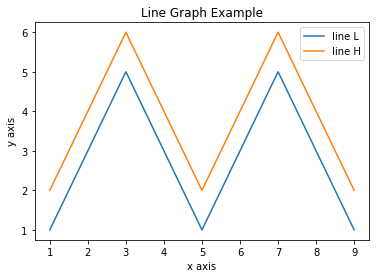

In [ ]:
x  = [1, 2, 3, 4, 5, 6, 7, 8, 9]
y1 = [1, 3, 5, 3, 1, 3, 5, 3, 1]
y2 = [2, 4, 6, 4, 2, 4, 6, 4, 2]
plt.plot(x, y1, label="line L")
plt.plot(x, y2, label="line H")
plt.plot()

plt.xlabel("x axis")
plt.ylabel("y axis")
plt.title("Line Graph Example")
plt.legend()
plt.show()

##Barras

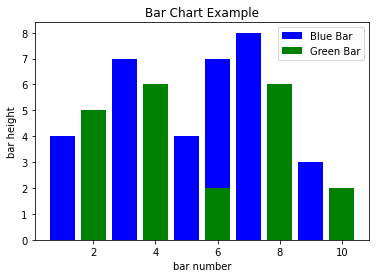

In [ ]:
# Look at index 4 and 6, which demonstrate overlapping cases.
x1 = [1, 3, 4, 5, 6, 7, 9]
y1 = [4, 7, 2, 4, 7, 8, 3]

x2 = [2, 4, 6, 8, 10]
y2 = [5, 6, 2, 6, 2]

# Colors: https://matplotlib.org/api/colors_api.html

plt.bar(x1, y1, label="Blue Bar", color='b')
plt.bar(x2, y2, label="Green Bar", color='g')
plt.plot()

plt.xlabel("bar number")
plt.ylabel("bar height")
plt.title("Bar Chart Example")
plt.legend()
plt.show()

##Histrogramas

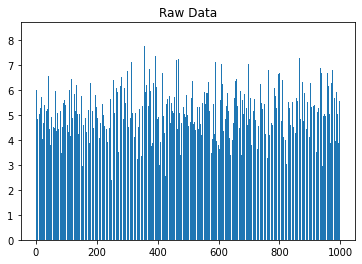

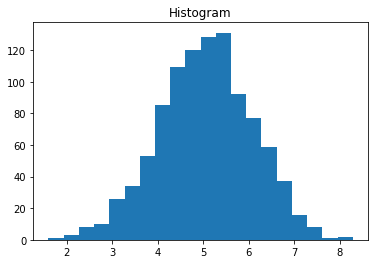

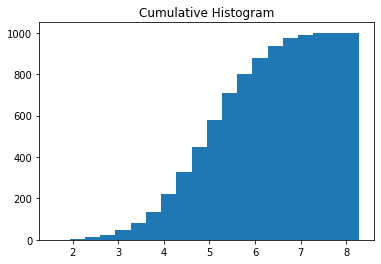

In [ ]:
# Use numpy to generate a bunch of random data in a bell curve around 5.
n = 5 + np.random.randn(1000)

m = [m for m in range(len(n))]
plt.bar(m, n)
plt.title("Raw Data")
plt.show()

plt.hist(n, bins=20)
plt.title("Histogram")
plt.show()

plt.hist(n, cumulative=True, bins=20)
plt.title("Cumulative Histogram")
plt.show()

##Scatter

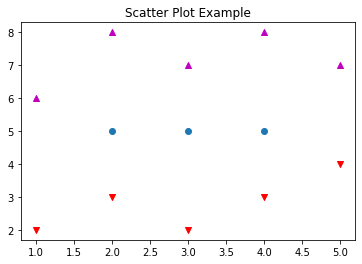

In [ ]:
x1 = [2, 3, 4]
y1 = [5, 5, 5]

x2 = [1, 2, 3, 4, 5]
y2 = [2, 3, 2, 3, 4]
y3 = [6, 8, 7, 8, 7]

# Markers: https://matplotlib.org/api/markers_api.html

plt.scatter(x1, y1)
plt.scatter(x2, y2, marker='v', color='r')
plt.scatter(x2, y3, marker='^', color='m')
plt.title('Scatter Plot Example')
plt.show()

##Guardar gráficos al disco
Una buena característica de Matplotlib es la capacidad de guardar figuras en una amplia variedad de formatos. Guardar una figura se puede hacer usando el comando savefig(). Por ejemplo, para guardar la figura anterior como un archivo PNG, puedes ejecutar esto:

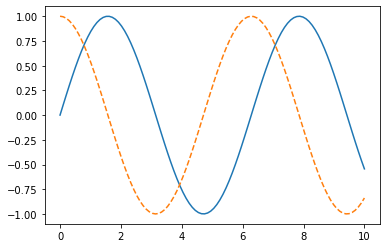

In [ ]:
x = np.linspace(0, 10, 100)

fig = plt.figure()
plt.plot(x, np.sin(x), '-')
plt.plot(x, np.cos(x), '--');

fig.savefig('my_figure.png')

#Trabajar con Pandas

In [ ]:
import numpy as np
import pandas as pd

# Enable Arrow-based columnar data transfers
spark.conf.set("spark.sql.execution.arrow.enabled", "true")

# Generate a pandas DataFrame
pdf = pd.DataFrame(np.random.rand(100, 3))

# Create a Spark DataFrame from a pandas DataFrame using Arrow
df = spark.createDataFrame(pdf)

# Convert the Spark DataFrame back to a pandas DataFrame using Arrow
result_pdf = df.select("*").toPandas()

https://spark.apache.org/docs/latest/sql-pyspark-pandas-with-arrow.html

#Ejemplos

##Cálculo del número PI

In [ ]:
from time import time
import numpy as np
from random import random
from operator import add

sc = spark.sparkContext

n = 10000000


def is_point_inside_unit_circle(p):
    # p is useless here
    x, y = random(), random()
    return 1 if x*x + y*y < 1 else 0


t_0 = time()

# parallelize creates a spark Resilient Distributed Dataset (RDD)
# its values are useless in this case
# but allows us to distribute our calculation (inside function)
count = sc.parallelize(range(0, n)) \
             .map(is_point_inside_unit_circle).reduce(add)
print(np.round(time()-t_0, 3), "seconds elapsed for spark approach and n=", n)
print("Pi is roughly %f" % (4.0 * count / n))

7.319 seconds elapsed for spark approach and n= 10000000
Pi is roughly 3.141681


# Montaje de Google Drive en Google Colab

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Ejercicios

##Word Count

In [ ]:
from google.colab import files
datafile = files.upload()

## Trend topic de Twitter

https://www.w3schools.com/python/python_ref_string.asp

In [ ]:
from google.colab import files
datafile = files.upload()

Lectura del conjunto de datos

In [ ]:
df = spark.read.json('......')